# Programming Project Title Here

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030
Driving distance avg 
Driving accuracy
Scoring average (actual)
GIR

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

import math

#insall fitter 

#https://pypi.org/project/fitter/
    




### Driving distance

https://www.pgatour.com/stats/stat.101.y2021.html

In [2]:
# Fetch the driving distance stats URL.
resp = rq.get('https://www.pgatour.com/stats/stat.101.y2021.html')
# Have a look
resp



<Response [200]>

In [3]:
# get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Create a file path for the original data
path = 'data/driving_stats_csv_' + nowstr + '.html'

path

'data/driving_stats_csv_20211202_155038.html'

In [5]:
# Save the original html file
with open(path, 'w') as f:
    f.write(resp.text)



In [6]:
# Compile the regular expression for matching lines
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
#re_rank = re.compile(r'([0-9]{3})(.*)')



In [7]:
#re_rank


In [8]:


# File path for the csv file
path = 'data/driving_stats_csv_' + nowstr + '.csv'



In [9]:
path

'data/driving_stats_csv_20211202_155038.csv'

In [10]:
df = pd.read_csv('data\strokes_gained.csv')
print(df.to_string()) 

    Fedex Rank 2021               Name  Driving distance (avg yds)  Driving accuracy (%)  Greens in Regulation (%)  Birdie average
0                 1    Patrick Cantlay                       302.8                 60.71                     70.16            4.29
1                 2           Jon Rahm                       309.0                 63.73                     71.93            4.51
2                 3           Kevin Na                       288.5                 66.56                     64.11            4.00
3                 4      Justin Thomas                       303.9                 55.72                     67.79            4.31
4                 5     Viktor Hovland                       302.2                 63.86                     68.61            4.40
5                 5  Xander Schauffele                       307.6                 58.83                     68.64            4.28
6                 7  Bryson DeChambeau                       323.7                 

In [11]:
df_arr = df
df_arr.columns = ['Fedex Rank 2021', 'Name', 'Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/
df_arr

,Fedex Rank 2021,Name,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,1,Patrick Cantlay,302.8,60.71,70.16,4.29
1,2,Jon Rahm,309.0,63.73,71.93,4.51
2,3,Kevin Na,288.5,66.56,64.11,4.00
3,4,Justin Thomas,303.9,55.72,67.79,4.31
4,5,Viktor Hovland,302.2,63.86,68.61,4.40
...,...,...,...,...,...,...
65,66,Harry Higgs,298.9,57.26,63.68,4.06
66,67,Mackenzie Hughes,293.5,58.05,64.44,3.66
67,68,Talor Gooch,299.1,60.16,65.80,3.80
68,69,Ryan Palmer,304.6,59.98,65.54,4.08


In [16]:
distance = df_arr.iloc[:,2]


In [17]:
accuracy = df_arr.iloc[:,3]


In [18]:
gir = df_arr.iloc[:,4]


In [19]:
birdies = df_arr.iloc[:,5]


In [21]:
my_array = np.array([[distance],[accuracy],[gir],[birdies]])               
my_array

array([[[302.8 , 309.  , 288.5 , 303.9 , 302.2 , 307.6 , 323.7 , 312.9 ,
         294.7 , 290.4 , 296.7 , 305.5 , 307.9 , 319.3 , 297.8 , 309.4 ,
         297.9 , 299.4 , 305.3 , 299.5 , 297.1 , 295.4 , 305.3 , 305.  ,
         291.4 , 299.9 , 306.6 , 295.2 , 310.6 , 310.7 , 298.4 , 306.5 ,
         297.9 , 296.3 , 300.8 , 303.1 , 309.  , 289.1 , 300.2 , 292.5 ,
         291.7 , 293.8 , 297.5 , 300.7 , 299.6 , 294.9 , 304.  , 303.  ,
         300.6 , 294.1 , 303.  , 303.9 , 297.5 , 289.2 , 293.8 , 289.8 ,
         317.1 , 298.7 , 298.2 , 292.3 , 312.1 , 291.9 , 300.9 , 295.6 ,
         307.2 , 298.9 , 293.5 , 299.1 , 304.6 , 301.8 ]],

       [[ 60.71,  63.73,  66.56,  55.72,  63.86,  58.83,  54.18,  57.87,
          65.7 ,  71.05,  65.48,  56.29,  60.18,  57.36,  63.47,  61.18,
          59.23,  64.29,  58.9 ,  53.92,  69.12,  70.15,  61.12,  63.49,
          63.21,  62.25,  56.42,  69.6 ,  59.2 ,  56.63,  63.06,  57.11,
          58.26,  62.71,  58.44,  63.94,  56.11,  67.61,  65.03,

In [22]:
df = pd.DataFrame(np.concatenate(my_array))
print(df)
print(type(df))

       0       1       2       3       4       5       6       7       8   \
0  302.80  309.00  288.50  303.90  302.20  307.60  323.70  312.90  294.70   
1   60.71   63.73   66.56   55.72   63.86   58.83   54.18   57.87   65.70   
2   70.16   71.93   64.11   67.79   68.61   68.64   67.15   66.67   66.47   
3    4.29    4.51    4.00    4.31    4.40    4.28    4.50    4.25    3.69   

       9   ...      60      61      62      63      64      65      66  \
0  290.40  ...  312.10  291.90  300.90  295.60  307.20  298.90  293.50   
1   71.05  ...   56.94   63.44   58.03   66.32   56.50   57.26   58.05   
2   69.27  ...   68.81   68.35   67.76   69.21   64.62   63.68   64.44   
3    4.20  ...    4.07    3.72    4.23    3.97    3.83    4.06    3.66   

       67      68      69  
0  299.10  304.60  301.80  
1   60.16   59.98   54.47  
2   65.80   65.54   62.99  
3    3.80    4.08    3.72  

[4 rows x 70 columns]
<class 'pandas.core.frame.DataFrame'>


In [23]:
df_t = df.T
df_t.columns = ['Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [45]:
df_t.head()

,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,302.8,60.71,70.16,4.29
1,309.0,63.73,71.93,4.51
2,288.5,66.56,64.11,4.00
3,303.9,55.72,67.79,4.31
4,302.2,63.86,68.61,4.40


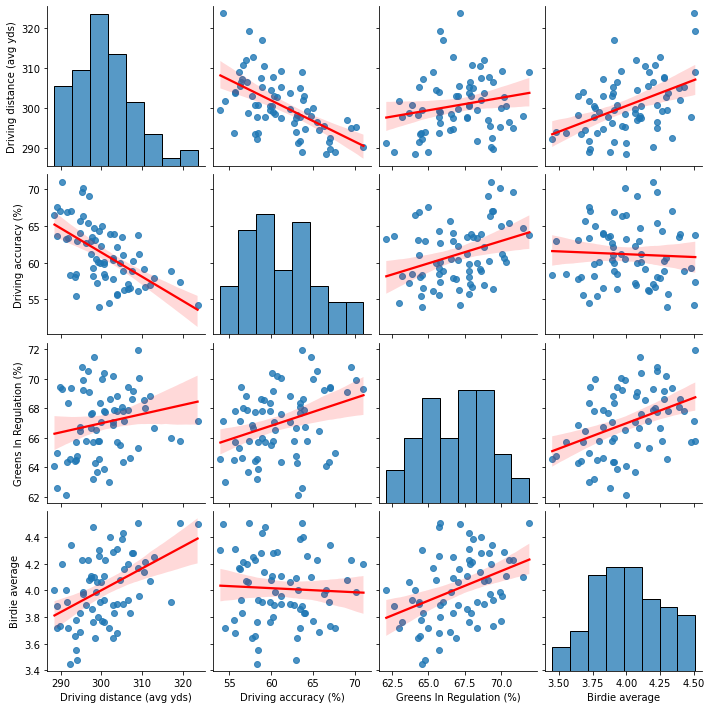

In [25]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [26]:
#from scipy import stats
#data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)
#print(data)

In [30]:
fitdistance = np.array([distance])


[[302.8 309.  288.5 303.9 302.2 307.6 323.7 312.9 294.7 290.4 296.7 305.5
  307.9 319.3 297.8 309.4 297.9 299.4 305.3 299.5 297.1 295.4 305.3 305.
  291.4 299.9 306.6 295.2 310.6 310.7 298.4 306.5 297.9 296.3 300.8 303.1
  309.  289.1 300.2 292.5 291.7 293.8 297.5 300.7 299.6 294.9 304.  303.
  300.6 294.1 303.  303.9 297.5 289.2 293.8 289.8 317.1 298.7 298.2 292.3
  312.1 291.9 300.9 295.6 307.2 298.9 293.5 299.1 304.6 301.8]]


,sumsquare_error,aic,bic,kl_div
rayleigh,0.076304,802.487333,-469.010063,inf
lognorm,0.076425,808.376383,-464.650214,inf
chi2,0.076710,804.649877,-464.390080,inf
gamma,0.076710,804.649903,-464.390052,inf
norm,0.077290,834.041254,-468.111445,inf


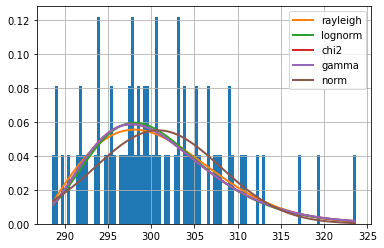

In [28]:
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
#https://pypi.org/project/fitter/
#https://fitter.readthedocs.io/en/latest/faqs.html#what-are-the-distributions-available
from fitter import get_common_distributions
get_common_distributions()
from fitter import Fitter
f = Fitter(fitdistance, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [29]:
f.get_best(method = 'sumsquare_error')

{'rayleigh': {'loc': 287.0868186050609, 'scale': 10.95631973450922}}

In [31]:
fitaccuracy = np.array([accuracy])

,sumsquare_error,aic,bic,kl_div
rayleigh,0.384582,614.939666,-355.789501,inf
gamma,0.387884,623.417573,-350.942581,inf
chi2,0.387884,623.417593,-350.942575,inf
lognorm,0.390107,625.445273,-350.542650,inf
norm,0.398054,625.591947,-353.379363,inf


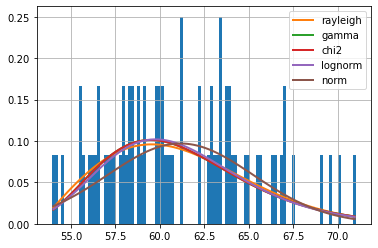

In [35]:
f = Fitter(fitaccuracy, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [36]:
f.get_best(method = 'sumsquare_error')

{'rayleigh': {'loc': 53.22409512121668, 'scale': 6.319240523124456}}

In [37]:
fitgir = np.array([gir])

,sumsquare_error,aic,bic,kl_div
norm,1.866739,507.530775,-245.204158,inf
gamma,1.867797,509.501022,-240.916015,inf
lognorm,1.868230,509.758946,-240.899774,inf
chi2,1.871748,508.962167,-240.768082,inf
rayleigh,1.892518,495.351471,-244.244098,inf


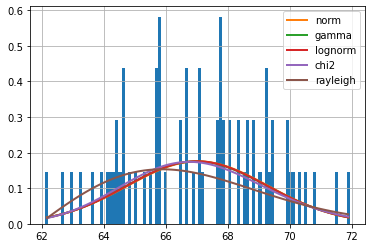

In [38]:
f = Fitter(fitgir, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [40]:
fitbirdies = np.array([birdies])

,sumsquare_error,aic,bic,kl_div
exponpow,127.606059,44.354190,54.777168,inf
lognorm,128.573756,61.100260,55.306009,inf
gamma,128.621001,60.961213,55.331726,inf
norm,128.671788,58.793928,51.110866,inf
rayleigh,129.067693,inf,51.325915,inf


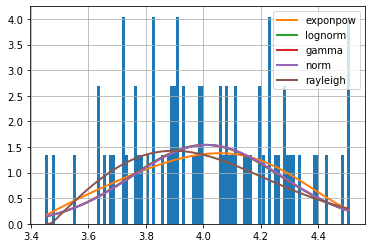

In [41]:
f = Fitter(fitbirdies, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
df = pd.read_csv('data\driving_stats.csv')

print(df.to_string()) 

Name
Driving distance avg (https://www.pgatour.com/content/pgatour/stats/stat.101.y2021.html)
Driving accuracy % (https://www.pgatour.com/content/pgatour/stats/stat.102.y2021.html)
GIR (https://www.pgatour.com/content/pgatour/stats/stat.103.y2021.eoff.t013.html)
Fedex Cup Regular Season Standings (https://www.pgatour.com/content/pgatour/stats/stat.02394.y2021.html)

In [ ]:
df_arr = df
df_arr.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_arr

In [ ]:
# Write a function / loop to plot these histograms
# Investigate how to determine what their distribution is... Skilearn? 

In [ ]:
#distance2020 = df_arr.iloc[:,0]
#distance2020
x = df_arr.iloc[:,0]
x

In [ ]:
plt.hist(x)

In [ ]:
#accuracy2020 = df_arr.iloc[:,1]
#accuracy2020
y = df_arr.iloc[:,1]
y

In [ ]:
plt.hist(y)

In [ ]:
#plt.scatter(distance2020, accuracy2020)
#m, b = np.polyfit(distance2020, accuracy2020, 1)
#plt.plot(distance2020, m*distance2020 + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

#plt.scatter(z,y)
#m, b = np.polyfit(z,y, 1)
#plt.plot(z, m*z + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python



In [ ]:
z = df_arr.iloc[:,2]
z

In [ ]:
# make a note that low scoring is better
plt.hist(z)

In [ ]:
plt.scatter(y,z)

plt.show()

In [ ]:
plt.scatter(y,x)
plt.show()

In [ ]:
plt.scatter(y,x)
m, b = np.polyfit(y, x, 1)
plt.plot(y, m*y + b)
plt.show()

In [ ]:
zz = df_arr.iloc[:,3]
zz

In [ ]:
plt.hist(zz)

In [ ]:
plt.scatter(z,zz)

plt.show()

In [ ]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

In [ ]:
df = pd.DataFrame(np.concatenate(my_array))
print(df)
print(type(df))

In [ ]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_t.head()

In [ ]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [ ]:
# Driving distacnce
mu, sigma = 316.5, 5.1

x = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(x, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [ ]:
x.max()

In [ ]:
x.min()

In [ ]:
len(x)

X is a continuous random variable since time is measured. It is given that μ = 4 minutes. To do any calculations, you must know m, the decay parameter.

m=\frac{1}{\mu }. Therefore, m=\frac{1}{4}=0.25.

The standard deviation, σ, is the same as the mean. μ = σ

The distribution notation is X ~ Exp(m). Therefore, X ~ Exp(0.25)

The probability density function is f(x) = me–mx

m = 1/4
m

sd = m
sd

exponent = 1
e = math.exp(exponent)
#https://www.educative.io/edpresso/calculating-the-exponential-value-in-python

fx = ((0.25) * e**((-0.25)*(5)))
fx

#https://www.biob.in/2014/02/exponential-graph-using-python.html

a = 0.25
b = 0.25
c = 1
x = np.linspace(0, 2, 1000, endpoint = True)
y = (a * e**(-b*x)) + c

plt.plot(x, y, '-r', label=r'$y = 5e^{-2x} + 1$')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve')
plt.legend(loc='upper left')

plt.show()

np.random.exponential(64, 100)

In [ ]:
# Driving accuracy average
mu, sigma = 62.6, 3.1

y = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(y, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [ ]:
y

In [ ]:
y.max(), y.min(), len(y)


In [ ]:
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

In [ ]:
mu, sigma = 69.4, 0.4

z = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(z, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
mu, sigma = 70.2, 1.5

zz = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(zz, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

In [ ]:
#irisData = pd.read_csv('bezdekIris.data', header = None)  
#irisData.columns = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)','Class']

In [ ]:
df = pd.DataFrame(np.concatenate(my_array))


print(df)
print(type(df))

In [ ]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_t.head()

In [ ]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot